### World Daily News - COVID19 Articles NLP

# Project Overview

### Introduction

The international news company World Daily News is going through key executive changes, and are keen on conducting a company-wide overview of its articles. They have thousands of articles from all over the world in various categories that refer to the COVID-19 pandemic, and are particulary interested in the information they can get out of the data. More precisely, World Daily News wants a model that predicts the category of a given text mentioning COVID-19, as well as a model that analyses the articles’ sentiment towards the pandemic and compares the results of the different categories in which the articles lie.

The following project performed by Lumos should aid World Daily News in extracting constructive insights and help them make better qualified decisions.

### Data

The data sent to us by World Daily News can be classified as Big Data. Initially, it amounted to ~470,000 rows, after which we randomly extracted a ~10,000 sample of observations. The reason we did it is because when previously randomly extracting ~50,000 observations, only 200 articles of a specific category were sampled, leading to no observations being included when performing the train/test split in the Machine-Learning (ML) segment. Therefore, we took the minimum number of the smallest category from the complete dataset (i.e. "ESG": 2045), and randomly sampled by this value from the other categories. This way, we ensured a balanced dataset and trust-worthy results of the models.

However, we may still argue that the models we perform could be scaled and potentially improved, and we are more than happy to work together in achieving that in the future.

The dataset consists of three variables:

* **Title**: The title of the respective article. This column is, on average, clean and does not require extensive pre-processing.
* **Content**: The content of the respective article. This column required extensive pre-processing, especially since there are numerous articles in languages other than English.
* **Category**: The category of the respective article. There are only 5 categories, those being: General, Business, ESG, Tech and Science.

### Approach

#### EDA
Firstly, we began with the Exploratory Data Analysis (EDA) phase in order to better observe the data and extract any key information before heading to the next parts of the case. After we gathered as much information as we could, we began with cleaning / pre-processing the data with the help of the `nltk` package. 

#### Machine-Learning
As soon as the data was ready to be utilized, we initiated the Machine Learning (ML) phase, which is concerned with the classification task. We have built baseline models, after which we hyperparameter tuned them in order to gain the best performance. We have built with a Multinomial Naive Bayes Classifier, Random Forests, K-Nearest Neighbors Classifier and finally a Gradient Boosting Classifier.

#### Sentiment Analysis
The final task was concerned with the sentiment analysis model, and we were able to observe the main factors (e.g., lexicon) that affect specific categories of articles.

### Results

We have observed that the best performing model was the Gradient Boosting Classifier. After the cross-validation process, the model performed with a Precision rate of 74%. Precision was the measurement used to test the models' performances, particularly because the costs of False Positive is high. If the articles aren't classified accordingly to their categories, some World Daily News subscribed readers may miss on specific articles that are labeled otherwise than they anticipate.

The sentiment analysis model has also identified the overall sentiment across the articles. We have identified that "ESG" tends to have the most positive-perceived sentiment, with 70% of the total articles from the respective category sharing that. The least positive category was "Science", with a positive rate of 42%.

### Limitations

No substantial limitations were observed throughout the execution of the project, other than the limited computational power. It may also be observed that the following Notebook may take longer than anticipated to run, however should perform correctly.

### Division of work

Each part had a "lead" programmer focused on the specific segment, however the responsibilities of the entire project were equally distributed. Each member was involved in each segment and contributed accordingly.

**We invite you to analyse our code below and observe our thought-process during this case study.**

# #1 Libraries

Importing the required libraries.

In [1]:
# For dataframe management.
import pandas as pd
import numpy as np

# For text pre-processing.
import re, string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# For sentiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# For model-building.
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Bag of words.
from sklearn.feature_extraction.text import TfidfVectorizer

# For plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# For language detection.
from langdetect import detect

# For word clouds.
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# #2 Data Analysis - Everyone

Let's import the subset of ~10,000 observations into a `pandas` DataFrame.

In [2]:
covid_df = pd.read_csv('./data_cleaned_2.csv')

In [3]:
covid_df

,Unnamed: 0,title,content,category
0,0,CHATBOTS AND WHY THEY ARE THE FUTURE TREND AND...,Chatbots are clearly the ‘ Future of Engagemen...,tech
1,1,Study outlines testing strategies for safer ai...,The study offers much-needed data to airlines ...,science
2,2,Elite bureaucrat's resignation takes the wind ...,Attempts by Prime Minister Yoshihide Suga to r...,tech
3,3,AMD's efficient Ryzen 9 CPUs target Intel's ga...,While AMD is winning over the workstation mark...,tech
4,4,Oil Edges Higher After Slump as Investors Asse...,The information you requested is not available...,general
...,...,...,...,...
10220,10220,Advancing an equitable vision for the jewelry ...,Women drive 90 percent of demand for jewelry i...,esg
10221,10221,Tokyo's voluntary standstill may have stopped ...,A new comparative analysis of people's mobilit...,science
10222,10222,"U.S. crude oil prices top $ 75 a barrel, the h...",Oil prices broke above $ 75 a barrel on Thursd...,business
10223,10223,100 US colleges and universities are now requi...,\nCollege students hesitant to receive a Covid...,general


We can observe that we have no missing values.

In [4]:
covid_df.isna().sum()

Unnamed: 0    0
title         0
content       0
category      0
dtype: int64

Previously, we had a highly imbalanced dataset with the Business category having the highest number of articles (27747), while ESG had merely 203 articles. We later adjusted for such an imbalance because of errors in our train/test split, hence we sampled a balanced dataset.

In [5]:
category_values = covid_df['category'].value_counts()
category_values

tech        2045
science     2045
general     2045
esg         2045
business    2045
Name: category, dtype: int64

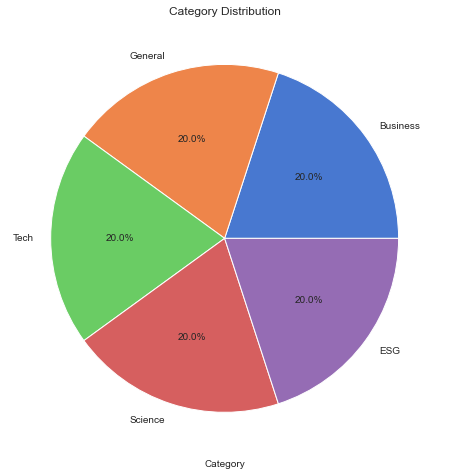

In [6]:
sns.set_style("whitegrid")
sns.set_palette("muted")

# Plot the graph.
g = plt.figure(figsize=(8, 8))
labels = ["Business", "General", "Tech", "Science", "ESG"]
plt.pie(covid_df["category"].value_counts(), labels=labels, autopct='%.1f%%')
plt.xlabel("Category")
plt.title("Category Distribution")
plt.show()

This pie graph was used to represent a sample of 50K observations. On a balanced dataset, it does not have much significance.

# #3 Data cleaning

### Code used to sample observations:

The following code was used in Google Colab to randomly sample a balanced dataset of observations.

In [7]:
# df = pd.read_csv('/drive/My Drive/covid_articles_raw.csv')

# vc = df['category'].value_counts()
# obs = vc.values

# minobs = min(obs)
# target = "category"
# df = df.groupby(target).sample(n=minobs, random_state=1)
# df = df.sample(frac=1, random_state=1).reset_index(drop=True)

### Organizing the dataframe:

Let us firstly drop the unnecessary column titled "Unnamed: 0".

In [8]:
# Dropping the column.
covid_df = covid_df.drop(columns="Unnamed: 0")

After a closer look at the dataset, we noticed that not all of the articles are in the English language. While we could filter for only the Latin characters, we may still get articles in languages such as French, Spanish or German. Therefore, we utilize the `langdetect` package and apply the detect function over the "title" column.

In [9]:
covid_df['language'] = covid_df['title'].apply(detect)

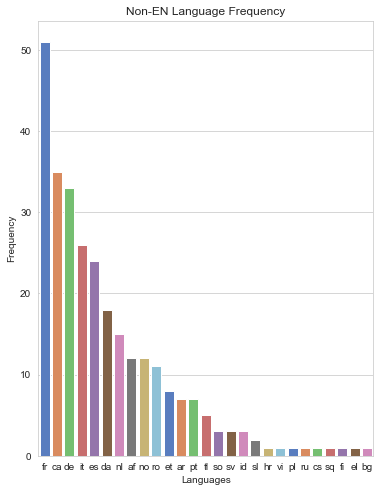

In [10]:
# Extracting the number of non-English articles. This is necessary because otherwise the graph would look highly skewed.
non_en_lan = covid_df.copy()
non_en_lan = non_en_lan[non_en_lan['language'] != "en"]

# Plot the graph.
g = plt.figure(figsize=(6, 8))
g = sns.countplot(x="language", data=non_en_lan, order = non_en_lan["language"].value_counts().index, palette="muted")
g.set(xlabel="Languages")
g.set(ylabel="Frequency")
plt.title("Non-EN Language Frequency")
plt.show()

We can see that majority of our articles are in English, while some are also in Spanish, French, German or Italian. We will now filter for only English languages since the packages we implement (such as `nltk`) have a better performance over English content.

In [11]:
covid_df = covid_df[covid_df['language'] == "en"]

# Resetting the index since we have sliced the DataFrame.
covid_df = covid_df.reset_index(drop=True)

In [12]:
covid_df.iloc[[246]]["content"].tolist()

['India’ s largest IT company appears to be taking cues from American tech firms when it comes to Covid-19 vaccinations.\nTata Consultancy Services, which employs over 500,000 people, has set up a vaccination policy under which it plans to allow only vaccinated employees to work from its offices. The only exception to this rule will be those who do not get vaccinated due to medical reasons and can produce a doctor’ s certificate to support the same.\n“ I set up a vaccination policy three months ago where we are saying we want everybody to be vaccinated, ” chief human resources officer Milind Lakkad told Quartz in an Aug. 24 interview. “ The intent is to have people be vaccinated before they can come to the office for sure. ”\nTo achieve this goal, TCS has partnered with scores of hospitals where its employees can get vaccinated. Over 90% of TCS employees and their families have already received the first dose, and Lakkad expects that by Sept. 30, they will have received their second do

Factorizing the categories since the models will perceive it better as an integer, rather than categorical strings.

In [13]:
covid_df['category'] = pd.factorize(covid_df['category'])[0] + 1

In [14]:
# Creating a copy of the DataFrame.
covid_df_copy = covid_df.copy()

# Dropping the language column, since we do not require it anymore.
covid_df_copy = covid_df_copy.drop(columns = "language", axis=1)

### Cleaning the article contents:

Since the data wasn't carefully scraped from the websites, it may be the case that parts of it include material unique to the HTML web style. Therefore, we have created the `clean_html` function that should clean the article content of such occurences.

In [15]:
def clean_html(html):
    
    # Parse the HTML content of an article with the help of BeautifulSoup package.
    soup = BeautifulSoup(html, "html.parser")
    for data in soup(['style', 'script', 'code', 'a']):
        # Remove any kind of tags.
        data.decompose()
        
    return ' '.join(soup.stripped_strings)

covid_df_copy['content'] = covid_df_copy['content'].apply(lambda x: clean_html(x))

The following function, `clean_text`, will take care of the main article content, such as change the words to lower case, remove irrelevant string features, remove stopwords, and finally stem or lemmatize the word. 

The choice of our text normalization technique is **lemmatization**. That is because lemmatization does not simply reduce words to their roots, but instead considers a language's vocabulary to apply a morphological analysis to words. For example, stemming a word would mean chopping its ending up until its stem. This approach would not give an intuitive outlook to World Daily News when analyzing the factors influencing the articles and respective categories. However, lemmatization would keep the main gist of the words and result in interpretative results.

In [16]:
def clean_text(text, stem="None"):

    final_string = ""

    # Make the article content lower case.
    text = text.lower()

    # Remove specific characters with the help of the RegEx package.
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|\n|\d", "", text)
    
    # Split the words.
    text = text.split()

    # Remove any kind of punctuation.
    translator = str.maketrans('', '', string.punctuation)
    text = list( [ word.translate(translator) for word in text ] )
    
    # Remove English stopwords with the help of NTLK's corpus.
    useless_words = stopwords.words("english")
    text_filtered = [word for word in text if not word in useless_words]

    # Stem or lemmatize the article strings.
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

covid_df_copy['content'] = covid_df_copy['content'].apply(lambda x: clean_text(x, stem="Lem"))

In [17]:
covid_df_copy.iloc[[246]]["content"].tolist()

['india largest company appears taking cue american tech firm come covid vaccinationstata consultancy service employ people set vaccination policy plan allow vaccinated employee work office exception rule get vaccinated due medical reason produce doctor certificate support set vaccination policy three month ago saying want everybody vaccinated chief human resource officer milind lakkad told quartz aug interview intent people vaccinated come office sure achieve goal tc partnered score hospital employee get vaccinated tc employee family already received first dose lakkad expects sept received second dos tooseveral company u including telco investment firm blackrock consultancy deloitte fastfood chain mcdonald well tech giant like facebook google microsoft netflix made mandatory employee vaccinated wish work office india company made vaccine compulsory farthis probably mere third indian population managed get least one shot far comparison u resident received least one doseto achieve targe

# #4 EDA - Marcell

Let's observe the number of non-stopwords per articles. For such, we'll create a function that will count the number of words, and then graph the boxplot, without outliers.

In [18]:
# Return length of articles.
def article_length(text):
    words_list = text.split()
    return len(words_list)

covid_df_copy['a_len'] = covid_df_copy['content'].apply(lambda x: article_length(x))

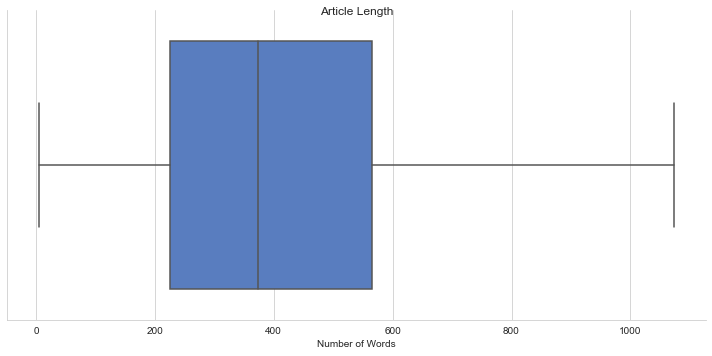

In [19]:
# Boxplot of length of articles, without outliers.
g = sns.catplot(x = "a_len", kind="box", sym="", data=covid_df_copy, aspect=2, palette="muted")
g.fig.suptitle("Article Length")
g.set(xlabel="Number of Words")
plt.show()

We can see that the Lower Quartile of the boxplot is at around ~220 words, while the Upper Quartile is at ~580 words. The median is at a value of ~380 words. Since this function is applied on text that has been cleaned from stopwords, we may state that the median should be around 100-200 words higher, including stopwords as they take part of our everyday language. This proves that the articles aren't usually overly long. 

It has been shown that the average reading speed of a human being is at 250 words per minute (wpm), meaning that World Daily News' articles contain brief yet important information for a reader to read the articles in a short time span.

### Word clouds:

Word clouds are images composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance. Let us keep in mind that the categories we have integer-encoded go as such: 

* **1** - Tech
* **2** - Science
* **3** - General
* **4** - ESG
* **5** - Business

Let's visualize the frequency and most used words with the help of word clouds for the article categories.

#### Tech:

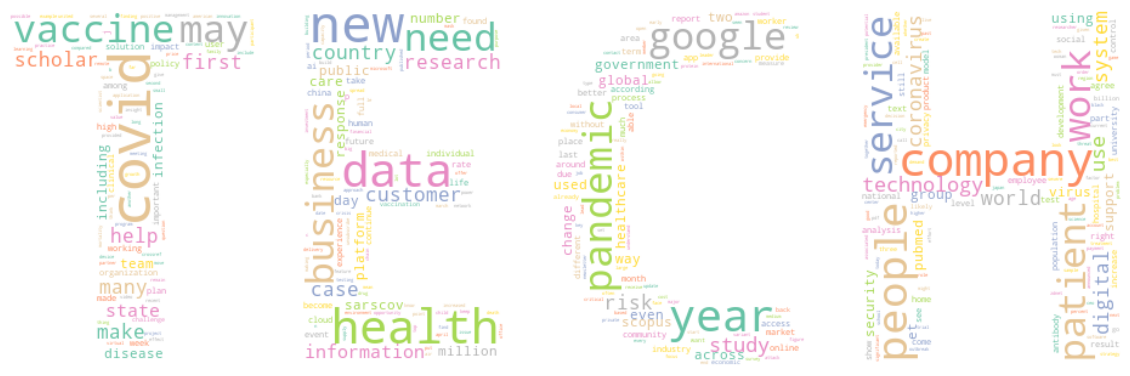

In [20]:
# Assign the text to the word cloud.
text = " ".join(content for content in covid_df_copy["content"][covid_df_copy["category"] == 1])

# Assign the mask.
mask = np.array(Image.open("./masks/tech.png"))

stopwords = STOPWORDS.update(["u", "time", "said", "one", "say", "says", "said", "well"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2', stopwords=stopwords, 
                      collocations=False, max_words=500, background_color="white", 
                      mask=mask).generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Top words**: health, business, google, data, patient, people, covid, technology, service.

#### Science:

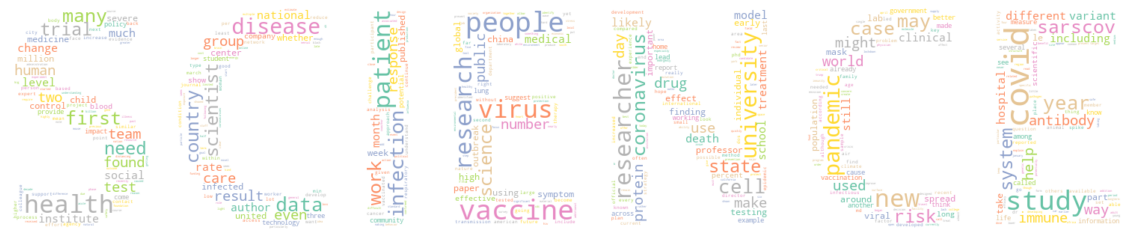

In [21]:
# Assign the text to the word cloud.
text = " ".join(content for content in covid_df_copy["content"][covid_df_copy["category"] == 2])

# Assign the mask.
mask = np.array(Image.open("./masks/science.png"))

stopwords = STOPWORDS.update(["u", "time", "said", "one", "say", "says", "said", "well"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2', stopwords=stopwords, 
                      collocations=False, max_words=500, background_color="white", 
                      mask=mask).generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Top words**: health, study, university, vaccine, covid, disease, cell, research, trial, patient.

#### General:

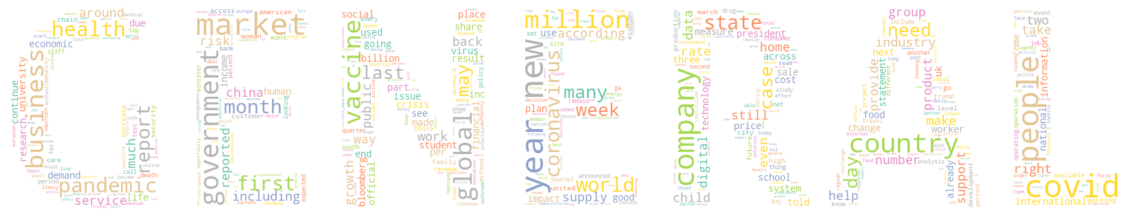

In [22]:
# Assign the text to the word cloud.
text = " ".join(content for content in covid_df_copy["content"][covid_df_copy["category"] == 3])

# Assign the mask.
mask = np.array(Image.open("./masks/general.png"))

stopwords = STOPWORDS.update(["u", "time", "said", "one", "say", "says", "said", "well"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2', stopwords=stopwords, 
                      collocations=False, max_words=500, background_color="white", 
                      mask=mask).generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Top words**: market, government, covid, million, global, vaccine, international, business, world.

#### ESG:

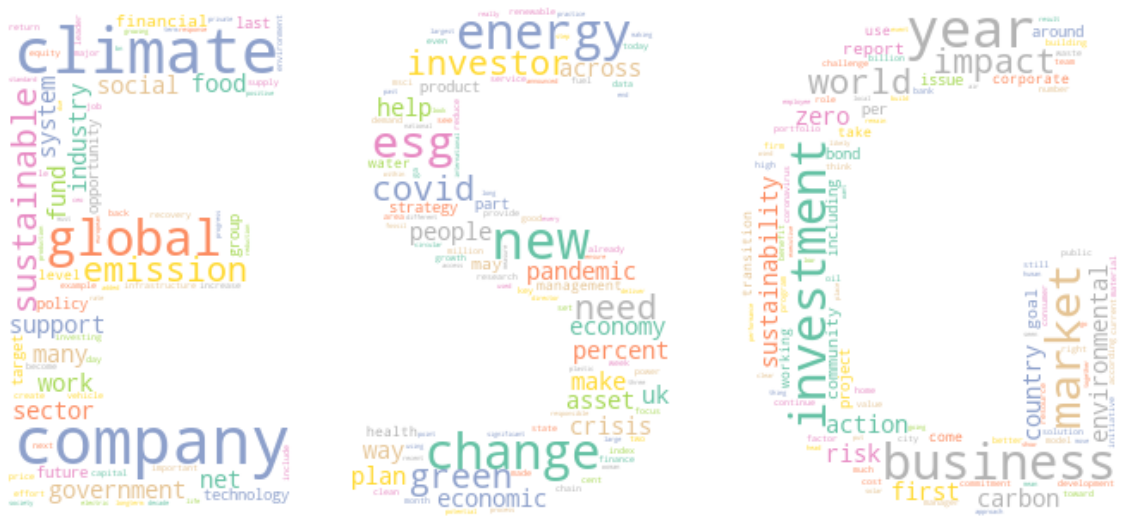

In [23]:
# Assign the text to the word cloud.
text = " ".join(content for content in covid_df_copy["content"][covid_df_copy["category"] == 4])

# Assign the mask.
mask = np.array(Image.open("./masks/esg.png"))

stopwords = STOPWORDS.update(["u", "time", "said", "one", "say", "says", "said", "well"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2', stopwords=stopwords, 
                      collocations=False, max_words=500, background_color="white", 
                      mask=mask).generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Top words**: climate, change, emission, esg, energy, investment, business, global, company, sustainable.

#### Business:

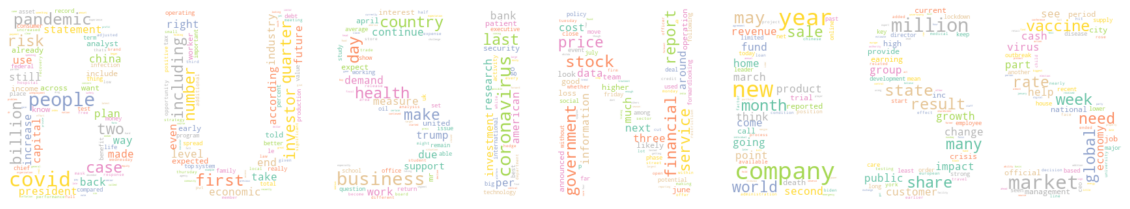

In [24]:
# Assign the text to the word cloud.
text = " ".join(content for content in covid_df_copy["content"][covid_df_copy["category"] == 5])

# Assign the mask.
mask = np.array(Image.open("./masks/Business.png"))

stopwords = STOPWORDS.update(["u", "time", "said", "one", "say", "says", "said", "well"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2', stopwords=stopwords, 
                      collocations=False, max_words=500, background_color="white", 
                      mask=mask).generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Top words**: market, report, president, investor, million, company, state, result, number, million.

# #5 Model-building - Dragomir

We will now proceed with the model-building phase.

### Data assigning:

Firstly, we will assign the independent variable (content) to X, and the dependent variable (category) we want to predict to y. Then, we will split the data in a 80% training set on which we will fit our models, and 20% testing cohort on which we will evaluate our model's performance.

In [25]:
# Assign features to X and labels to y.
X = covid_df_copy['content']
y = covid_df_copy['category']

# Split the data in 80% training and 20% testing cohort.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Bag of words:

In order to create a vectorial representation of the text strings for running our Machine Learning (ML) models, we opted for the implementation of a **TfidfVectorizer** instead of a CountVectorizer. Tfidf, also known as the *Term Frequency - Inverse Document Frequency*, allows one to determine the most important words in each document. As opposed to the CountVectorizer that only aggregates the most frequently mentioned words in the texts, Tfidf gives less importance to common words, such as stopwords, and keeps document specific frequent words weighted high. This was necessary to implement because the articles have a reocurrance of phrases that weren't standardized along them and were difficult to pre-process, such as "Published by" or "Donate here".

In [26]:
# Initialize a TfidfVectorizer object.
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.75, max_features=2000)

# Transform the training data.
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data.
tfidf_test = tfidf_vectorizer.transform(X_test.values)

In [27]:
print(tfidf_vectorizer.get_feature_names_out()[:200])

['ability' 'able' 'academic' 'accelerate' 'accelerated' 'access'
 'accessed' 'according' 'account' 'accounting' 'accurate' 'ace' 'achieve'
 'achieved' 'achieving' 'acknowledge' 'acquisition' 'act' 'action'
 'active' 'activity' 'actor' 'actual' 'actually' 'acute' 'ad' 'adapt'
 'add' 'added' 'adding' 'addition' 'additional' 'additionally' 'address'
 'addressing' 'adjusted' 'adjustment' 'administration' 'admission'
 'admitted' 'adopted' 'adoption' 'adult' 'advance' 'advanced' 'advantage'
 'advice' 'adviser' 'advisory' 'affect' 'affected' 'affecting' 'afp'
 'africa' 'african' 'age' 'aged' 'agency' 'agenda' 'agent' 'ago' 'agree'
 'agreed' 'agreement' 'agriculture' 'ahead' 'ai' 'aid' 'aim' 'aimed' 'air'
 'aircraft' 'airline' 'airport' 'al' 'alert' 'algorithm' 'alliance'
 'allocation' 'allow' 'allowed' 'allowing' 'allows' 'alongside'
 'alternative' 'amazon' 'ambition' 'ambitious' 'america' 'american' 'amid'
 'analysis' 'analyst' 'analytics' 'andrew' 'animal' 'announced'
 'announcement' 'annua

### Multinomial Naive Bayes:

In [28]:
# Initiate the MultinomialNB classifier model.
nb_classifier = MultinomialNB(alpha=0.001)

# Fit the model onto the training feature data that was vectorized, and the training label data.
nb_classifier.fit(tfidf_train, y_train)

# Predict the labels for the testing data.
pred = nb_classifier.predict(tfidf_test)

# Observe the classification report (precision, recall, F1-score).
print(classification_report(y_test, pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.64      0.59      0.61       373
           2       0.75      0.80      0.78       402
           3       0.56      0.52      0.54       389
           4       0.81      0.88      0.84       410
           5       0.65      0.64      0.64       415

    accuracy                           0.69      1989
   macro avg       0.68      0.69      0.68      1989
weighted avg       0.68      0.69      0.69      1989



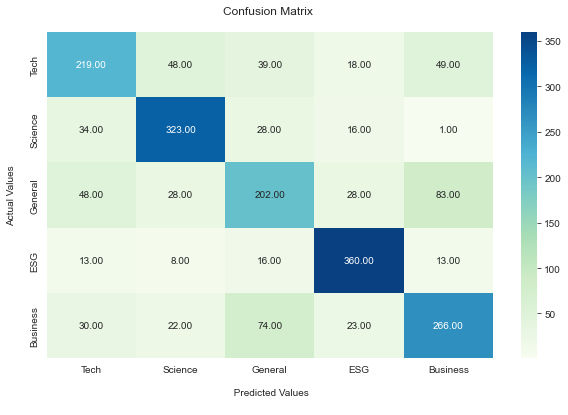

In [29]:
# Visualize the confusion matrix.
plt.figure(figsize=(10, 6))
fx = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".2f", cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(["Tech", "Science", "General", "ESG", "Business"])
fx.yaxis.set_ticklabels(["Tech", "Science", "General", "ESG", "Business"])
plt.show()

### Tuning of MultinomialNB:

In [30]:
# # Create a pipeline.
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words="english")),
#     ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)))
# ])

# # Assign parameters to both the TfidfVectorizer and the MultinomialNB classifier.
# parameters = {
#     'tfidf__max_df': (0.5, 0.75, 1),
#     'tfidf__max_features': (1000, 1500),
#     'clf__estimator__alpha': (0.01, 0.001)
# }

# # Initiate the GridSearchCV that will run through the assigned parameters. We are using a 5-fold cross-validation.
# grid_models = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=3)
# grid_models.fit(X_train, y_train)

# # Observe best parameters.
# print("Best parameters set:")
# print(grid_models.best_estimator_.steps)

### RandomForestClassifier:

In [31]:
# Initiate the RandomForestClassifier model.
random_forest = RandomForestClassifier(max_depth = 50, max_features = "sqrt", min_samples_split = 5, 
                                       n_estimators = 250, random_state=1)

# Fit the model onto the training feature data that was vectorized, and the training label data.
random_forest.fit(tfidf_train, y_train)

# Predict the labels for the testing data.
pred = random_forest.predict(tfidf_test)

# Observe the classification report (precision, recall, F1-score).
print(classification_report(y_test, pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.70      0.61      0.65       373
           2       0.75      0.90      0.82       402
           3       0.69      0.50      0.58       389
           4       0.82      0.93      0.87       410
           5       0.67      0.70      0.68       415

    accuracy                           0.73      1989
   macro avg       0.73      0.73      0.72      1989
weighted avg       0.73      0.73      0.72      1989



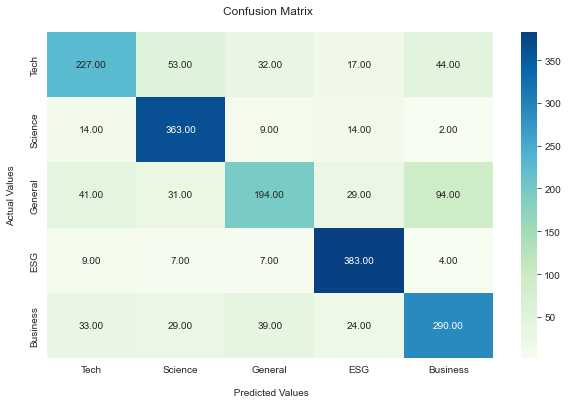

In [32]:
# Visualize the confusion matrix.
plt.figure(figsize=(10, 6))
fx = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".2f", cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(["Tech", "Science", "General", "ESG", "Business"])
fx.yaxis.set_ticklabels(["Tech", "Science", "General", "ESG", "Business"])
plt.show()

### Tuning of RandomForestClassifier:

In [33]:
# # Initiate the RandomForestClassifier.
# rf = RandomForestClassifier()

# # Assign parameters to the RandomForestClassifier.
# parameters = {
#     'max_depth': [10, 25, 50],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [100, 250, 300]
# }

# # Initiate the GridSearchCV that will run through the assigned parameters. We are using a 5-fold cross-validation.
# grid_models = GridSearchCV(rf, parameters, cv=5, n_jobs=-1, verbose=3)
# grid_models.fit(tfidf_train, y_train)

# # Observe best parameters.
# print("Best parameters set:")
# print(grid_models.best_estimator_)

### K-Neighbor Classification:

Performance doesn't improve after k=10. Slight improvement with k=15.

In [34]:
# Initiate the KNeighborsClassifier model.
knn = KNeighborsClassifier(n_neighbors=25, weights="distance")

# Fit the model onto the training feature data that was vectorized, and the training label data.
knn.fit(tfidf_train, y_train)

# Predict the labels for the testing data.
pred = knn.predict(tfidf_test)

# Observe the classification report (precision, recall, F1-score).
print(classification_report(y_test, pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.69      0.60      0.64       373
           2       0.70      0.85      0.77       402
           3       0.67      0.50      0.57       389
           4       0.76      0.90      0.83       410
           5       0.62      0.59      0.60       415

    accuracy                           0.69      1989
   macro avg       0.69      0.69      0.68      1989
weighted avg       0.69      0.69      0.68      1989



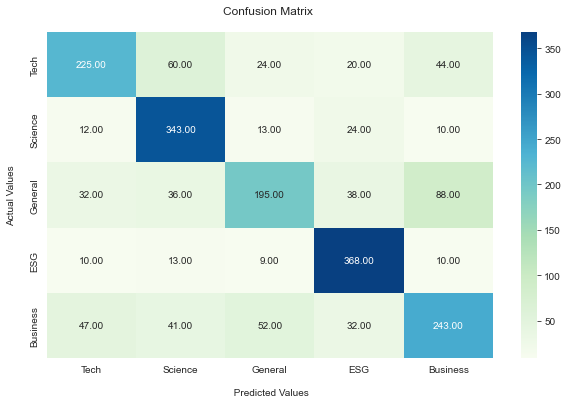

In [35]:
# Visualize the confusion matrix.
plt.figure(figsize=(10, 6))
fx = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".2f", cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(["Tech", "Science", "General", "ESG", "Business"])
fx.yaxis.set_ticklabels(["Tech", "Science", "General", "ESG", "Business"])
plt.show()

### Tuning of KNeighborClassifier:

In [36]:
# # Initiate the KNeigborsClassifier.
# knn = KNeighborsClassifier()

# # Assign parameters to the KNeighborsClassifier.
# parameters = {
#     'n_neighbors': [5, 15, 25],
#     'weights': ["uniform", "distance"],
#     'p': [1, 2]
# }

# # Initiate the GridSearchCV that will run through the assigned parameters. We are using a 2-fold cross-validation.
# grid_models = GridSearchCV(knn, parameters, cv=2, n_jobs=-1, verbose=3)
# grid_models.fit(tfidf_train, y_train)

# # Observe best parameters.
# print("Best parameters set:")
# print(grid_models.best_estimator_)

### Gradient Boosting:

In [37]:
# Initiate the GradientBoostingClassifier model.
gbc = GradientBoostingClassifier(max_depth = 10, min_samples_split = 5, 
                                 n_estimators = 250, random_state = 1)

# Fit the model onto the training feature data that was vectorized, and the training label data.
gbc.fit(tfidf_train, y_train)

# Predict the labels for the testing data.
pred = gbc.predict(tfidf_test)

# Observe the classification report (precision, recall, F1-score).
print(classification_report(y_test, pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.66      0.68      0.67       373
           2       0.81      0.87      0.84       402
           3       0.72      0.64      0.68       389
           4       0.87      0.90      0.88       410
           5       0.73      0.71      0.72       415

    accuracy                           0.76      1989
   macro avg       0.76      0.76      0.76      1989
weighted avg       0.76      0.76      0.76      1989



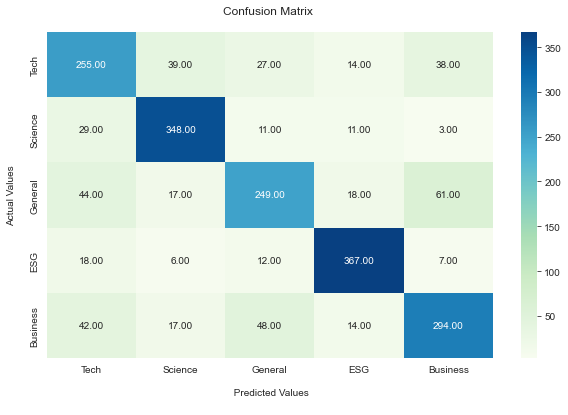

In [48]:
# Visualize the confusion matrix.
plt.figure(figsize=(10, 6))
fx = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".2f", cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(["Tech", "Science", "General", "ESG", "Business"])
fx.yaxis.set_ticklabels(["Tech", "Science", "General", "ESG", "Business"])
plt.show()

### Tuning of GradientBoostingClassifier:

In [39]:
# # Initiate the GradientBoostingClassifier.
# gbc = GradientBoostingClassifier()

# # Assign parameters to the GradientBoostingClassifier.
# parameters = {
#     'max_depth': [10, 25, 50],
#     'min_samples_split': [5, 10],
#     'n_estimators': [250, 300],
#     'subsample': [0.5, 0.8]
# }

# # Initiate the GridSearchCV that will run through the assigned parameters. We are using a 5-fold cross-validation.
# grid_models = GridSearchCV(gbc, parameters, cv=5, n_jobs=-1, verbose=3)
# grid_models.fit(tfidf_train, y_train)

# # Observe best parameters.
# print("Best parameters set:")
# print(grid_models.best_estimator_)

### Observe results:

In [40]:
# Let's manually check the true values and predicted values of the best model.
new_df = pd.DataFrame(X_test)
new_df["True Value"] = y_test
new_df["Predicted"] = pred
new_df[(new_df["True Value"] == 2) & (new_df["Predicted"] == 2)]

,content,True Value,Predicted
1814,following week meeting world health organizati...,2,2
6912,current severe effect global pandemic covid re...,2,2
6811,virus many strategy avoid immune system defens...,2,2
1005,engaged another deadly episode historic battle...,2,2
6400,misc occurs mainly child lead high fever hyper...,2,2
...,...,...,...
3272,jonathan cotliar knew ahead curve four year ag...,2,2
3187,testing important part tackling covid pandemic...,2,2
4410,marissa baker assistant professor uw school pu...,2,2
3290,study provides reassurance sarscov infection t...,2,2


# #6 Sentiment Analysis - Will

### Identifying sentiments:

In [41]:
# Initiate the sentiment analyzer.
sentim = SentimentIntensityAnalyzer()

# Create function that extracts the compound rate from the polarity scores.
def sentiment_analysis(content):
    return sentim.polarity_scores(content)['compound']

# Apply function.
covid_df_copy['Compound Rate'] = covid_df_copy['content'].apply((lambda x: sentiment_analysis(x)))

In [42]:
covid_df_copy.head(10)

,title,content,category,a_len,Compound Rate
0,CHATBOTS AND WHY THEY ARE THE FUTURE TREND AND...,chatbots clearly future engagement small busin...,1,504,0.9989
1,Study outlines testing strategies for safer ai...,study offer muchneeded data airline state stru...,2,429,0.9724
2,Elite bureaucrat's resignation takes the wind ...,attempt prime minister yoshihide suga rally su...,1,803,0.8922
3,AMD's efficient Ryzen 9 CPUs target Intel's ga...,amd winning workstation market intel still dom...,1,247,0.9873
4,Oil Edges Higher After Slump as Investors Asse...,information requested available time please ch...,3,248,-0.8266
5,Daily briefing: The scientist leading the ambi...,hellonaturereaders would like get briefing inb...,2,704,0.6852
6,'Another milestone for Britain ': UK grid comp...,uk recordbreaking run without coal power passe...,4,349,0.8316
7,Yvonne Murray: Covid made me more alone than e...,yvonne murray outside home co cork file pictur...,3,53,-0.6524
8,The coronavirus pandemic might cause plumbing ...,million people order stay home amid coronaviru...,4,482,0.9758
9,What the immune response to the coronavirus sa...,late healthy people moved new apartment salisb...,2,981,0.9954


In [43]:
# Label the sentiment values. The thresholds are provided as per literature review.
def sentiment_label(sentiment):
    if sentiment < -0.05:
        label = 'Negative'
    elif sentiment > 0.05:
        label = 'Positive'
    else:
        label = 'Neutral'
    return label

# Apply the function.
covid_df_copy['Sentiment'] = covid_df_copy['Compound Rate'].apply(sentiment_label)

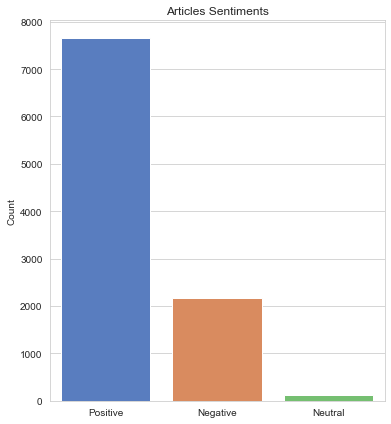

In [44]:
# Plotting the graph.
g = plt.figure(figsize=(6, 7))
g = sns.barplot(x = covid_df_copy["Sentiment"].value_counts().index, y = covid_df_copy["Sentiment"].value_counts(), palette="muted")
g.set(ylabel="Count")
plt.title("Articles Sentiments")
plt.show()

### Visualizing sentiments:

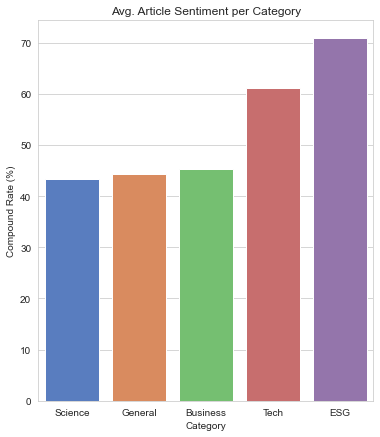

In [45]:
# Group the articles by category and then calculate the mean, multiplied by 100 to get percentages.
covid_df_copy_new = covid_df_copy.groupby(['category']).mean()["Compound Rate"] * 100
covid_df_copy_new = covid_df_copy_new.to_frame()
covid_df_copy_new = covid_df_copy_new.reset_index()

# Plot the graph.
g = plt.figure(figsize=(6, 7))
g = sns.barplot(x='category', y="Compound Rate", data=covid_df_copy_new, order=covid_df_copy_new.sort_values('Compound Rate').category, palette="muted")
g.set(xlabel="Category")
g.set(ylabel="Compound Rate (%)")
plt.title("Avg. Article Sentiment per Category")
g.set_xticklabels(["Science", "General", "Business", "Tech", "ESG"])
plt.show()

### Observing positive sentiment words:

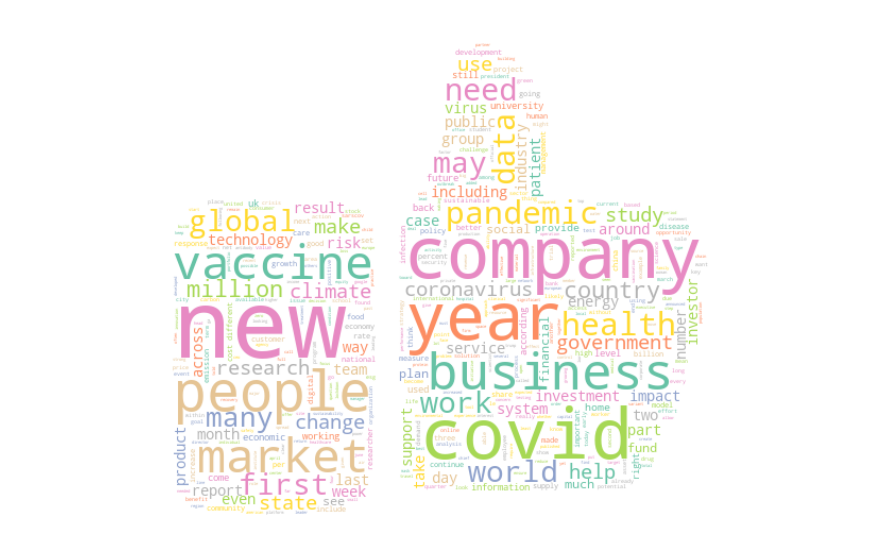

In [46]:
# Assign the text to the word cloud.
text = " ".join(content for content in covid_df_copy["content"][covid_df_copy["Sentiment"] == "Positive"])

# Assign the mask.
mask = np.array(Image.open("./masks/like.png"))

stopwords = STOPWORDS.update(["u", "time", "said", "one", "say", "says", "said", "well"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2', stopwords=stopwords, 
                      collocations=False, max_words=500, background_color="white", 
                      mask=mask).generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Top words**: company, business, vaccine, health, data, world, first, global, need.

### Observing negative sentiment words:

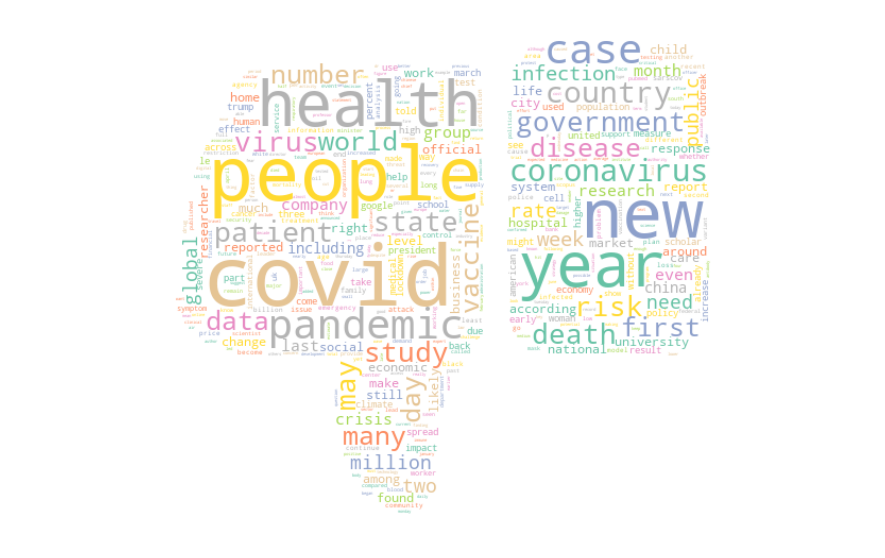

In [47]:
# Assign the text to the word cloud.
text = " ".join(content for content in covid_df_copy["content"][covid_df_copy["Sentiment"] == "Negative"])

# Assign the mask.
mask = np.array(Image.open("./masks/dislike.png"))

stopwords = STOPWORDS.update(["u", "time", "said", "one", "say", "says", "said", "well"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2', stopwords=stopwords, 
                      collocations=False, max_words=500, background_color="white", 
                      mask=mask).generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("sentiment_negative_words.svg")
plt.show()

**Top words**: people, health, disease, virus, risk, patient, infection, death, disease, government, case, year.